In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score

import shap

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Greenhouse Plant Growth Metrics.csv")

In [ ]:
print("Dimensão do dataset:", df.shape)

Dimensão do dataset: (30000, 14)


In [ ]:
print("Visualização das primeiras linhas:")
display(df.head())

Visualização das primeiras linhas:


,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [ ]:
print("Resumo estatístico:")
display(df.describe())

Resumo estatístico:


,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [ ]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Random    0
ACHP      0
PHR       0
AWWGV     0
ALAP      0
ANPL      0
ARD       0
ADWR      0
PDMVG     0
ARL       0
AWWR      0
ADWV      0
PDMRG     0
Class     0
dtype: int64


In [ ]:
le = LabelEncoder()
df["Class_encoded"] = le.fit_transform(df["Class"])
print("Mapeamento das classes:", dict(zip(le.classes_, le.transform(le.classes_))))

Mapeamento das classes: {'SA': np.int64(0), 'SB': np.int64(1), 'SC': np.int64(2), 'TA': np.int64(3), 'TB': np.int64(4), 'TC': np.int64(5)}


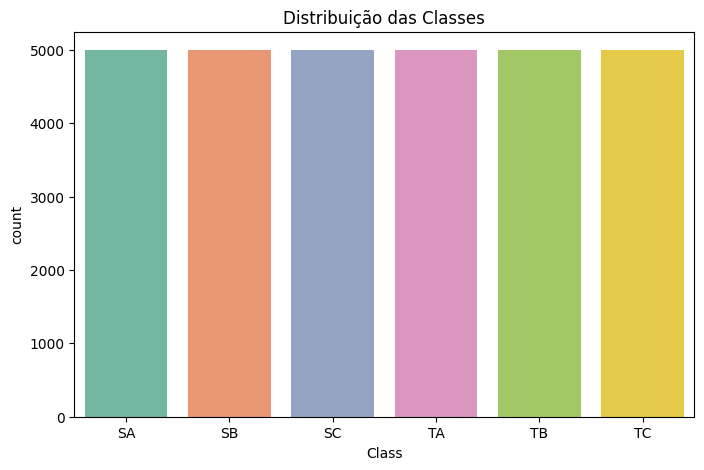

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Distribuição das Classes")
plt.show()

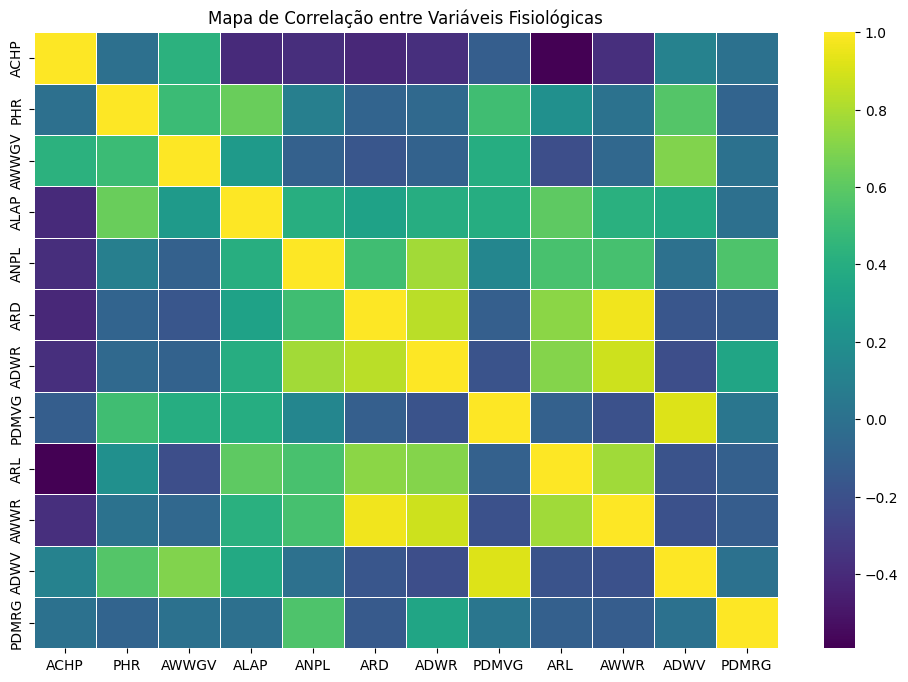

In [ ]:
corr = df.drop(columns=["Random", "Class", "Class_encoded"]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="viridis", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis Fisiológicas")
plt.show()

In [ ]:
X = df.drop(columns=["Random", "Class", "Class_encoded"])
y = df["Class_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensões do treino:", X_train.shape)
print("Dimensões do teste:", X_test.shape)

Dimensões do treino: (24000, 12)
Dimensões do teste: (6000, 12)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Exemplo de features normalizadas:")
print(X_train_scaled[:5])

Exemplo de features normalizadas:
[[ 1.22321805  1.12357055  1.96790934 -0.4602242  -1.35158787 -0.85766612
  -0.9991471   1.54617338 -1.04424465 -0.98067296  2.33511801 -0.0649413 ]
 [-0.33118624 -0.2585762  -0.89654743 -1.24515993 -1.35135197 -0.84432293
  -1.17446042 -0.07750215 -1.54262181 -1.07252142 -0.51957322 -0.3015082 ]
 [-1.20474159 -1.82724685 -1.25772081 -0.78971485 -1.3344801   0.66974875
  -0.21290622 -1.52934849  0.32969866  0.42451811 -1.3706638  -1.11018546]
 [-1.20785705 -1.82865995 -1.31363021 -0.78968905 -1.34797625  0.67061531
  -0.18087185 -1.52733171  0.34193404  0.43179758 -1.4974627  -1.110991  ]
 [ 1.2253309   1.12465384  2.02703549 -0.46018763 -1.33351833 -0.85724066
  -1.03640896  1.54528491 -1.05282609 -0.97689207  2.3177899  -0.06363372]]


In [ ]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))

=== Regressão Logística ===
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

=== Random Forest ===
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



<Figure size 800x600 with 0 Axes>

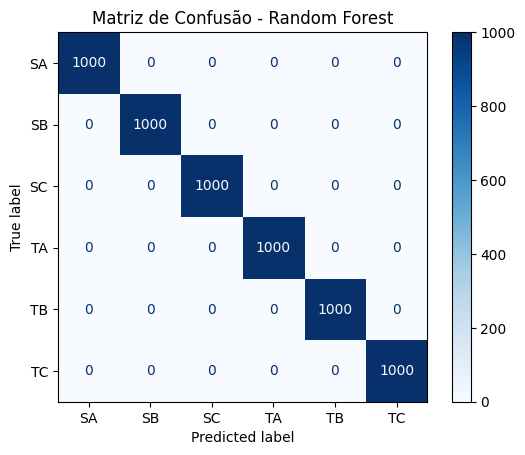

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

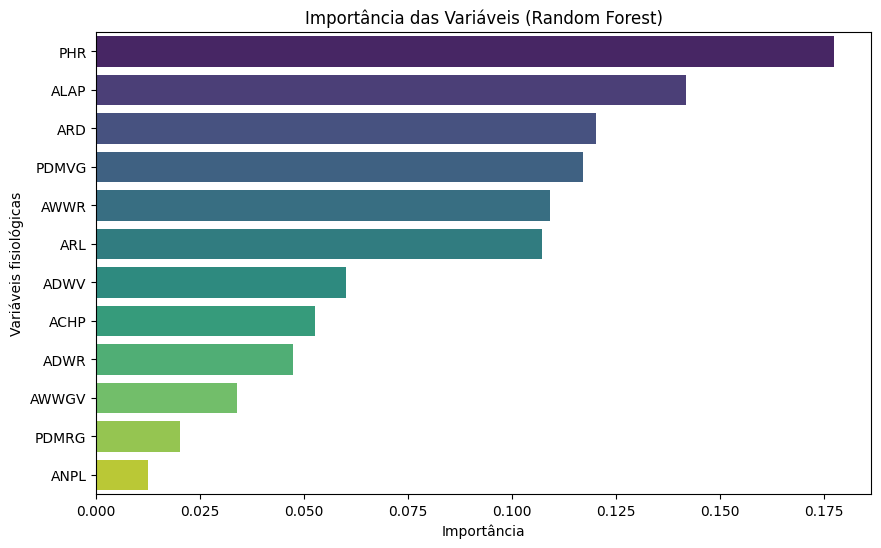

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Importância das Variáveis (Random Forest)")
plt.xlabel("Importância")
plt.ylabel("Variáveis fisiológicas")
plt.show()

In [ ]:
print("Ranking das variáveis mais importantes:")
print(feat_imp)

Ranking das variáveis mais importantes:
PHR      0.177592
ALAP     0.141980
ARD      0.120260
PDMVG    0.117008
AWWR     0.109249
ARL      0.107175
ADWV     0.060108
ACHP     0.052693
ADWR     0.047437
AWWGV    0.033978
PDMRG    0.020126
ANPL     0.012394
dtype: float64


In [ ]:
cv_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Acurácia (Regressão Logística - 5 folds):", cv_log)
print("Média:", cv_log.mean())

Acurácia (Regressão Logística - 5 folds): [1. 1. 1. 1. 1.]
Média: 1.0


In [ ]:
cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
print("\nAcurácia (Random Forest - 5 folds):", cv_rf)
print("Média:", cv_rf.mean())


Acurácia (Random Forest - 5 folds): [1. 1. 1. 1. 1.]
Média: 1.0


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

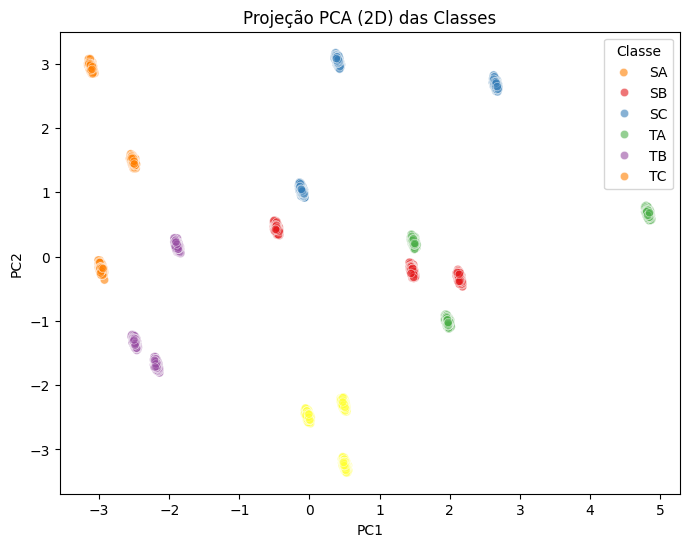

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette="Set1", alpha=0.6)
plt.title("Projeção PCA (2D) das Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Classe", labels=le.classes_)
plt.show()

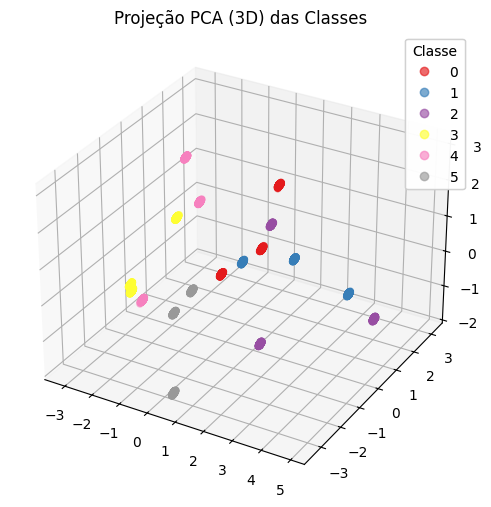

In [ ]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=y_train, cmap="Set1", alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Classe")
ax.add_artist(legend)
ax.set_title("Projeção PCA (3D) das Classes")
plt.show()


In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_scaled)

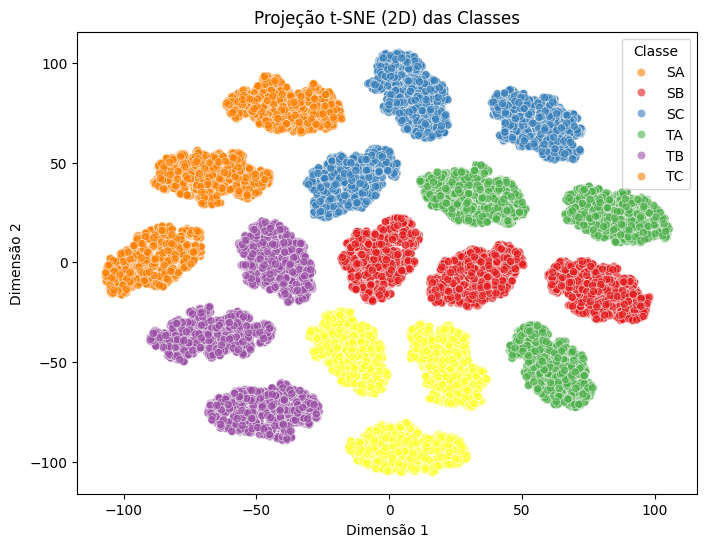

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette="Set1", alpha=0.6)
plt.title("Projeção t-SNE (2D) das Classes")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.legend(title="Classe", labels=le.classes_)
plt.show()

In [ ]:
tsne3 = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne3 = tsne3.fit_transform(X_train_scaled)

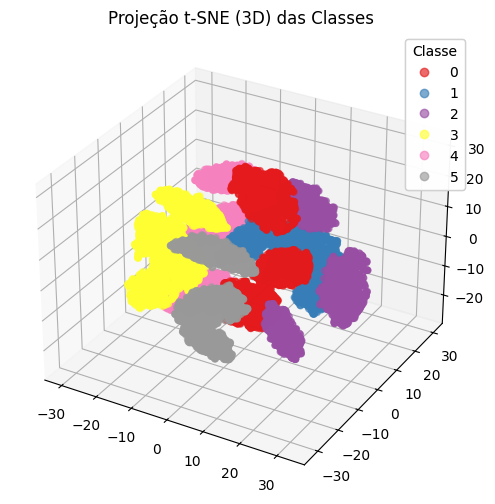

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_tsne3[:,0], X_tsne3[:,1], X_tsne3[:,2],
                     c=y_train, cmap="Set1", alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Classe")
ax.add_artist(legend)
ax.set_title("Projeção t-SNE (3D) das Classes")
plt.show()

In [ ]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

=== XGBoost ===
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1000
          SB       1.00      1.00      1.00      1000
          SC       1.00      1.00      1.00      1000
          TA       1.00      1.00      1.00      1000
          TB       1.00      1.00      1.00      1000
          TC       1.00      1.00      1.00      1000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



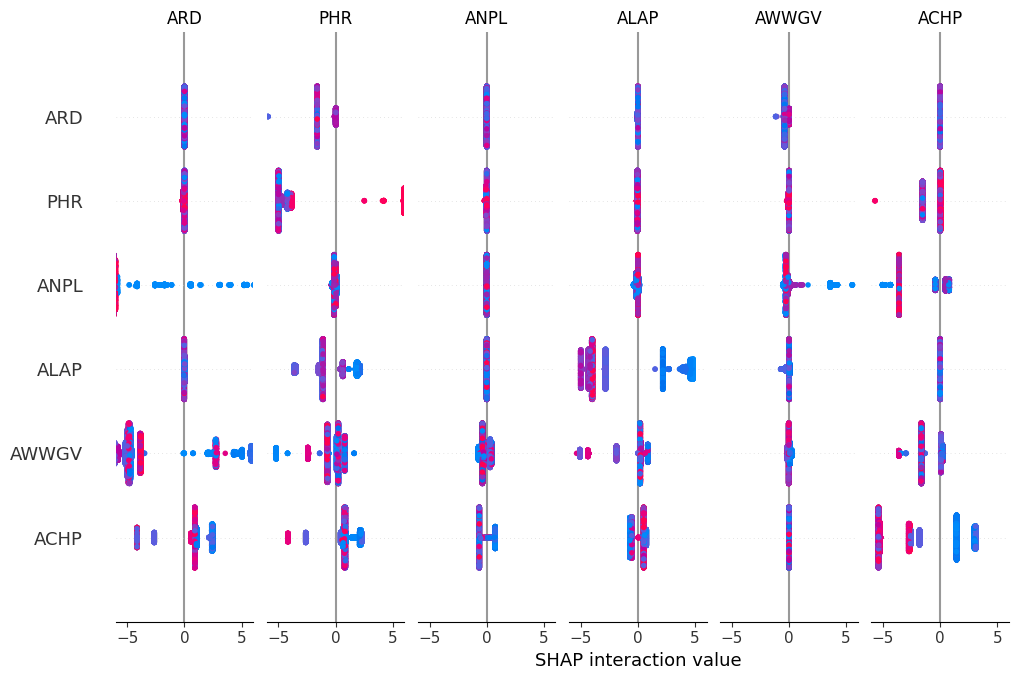

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

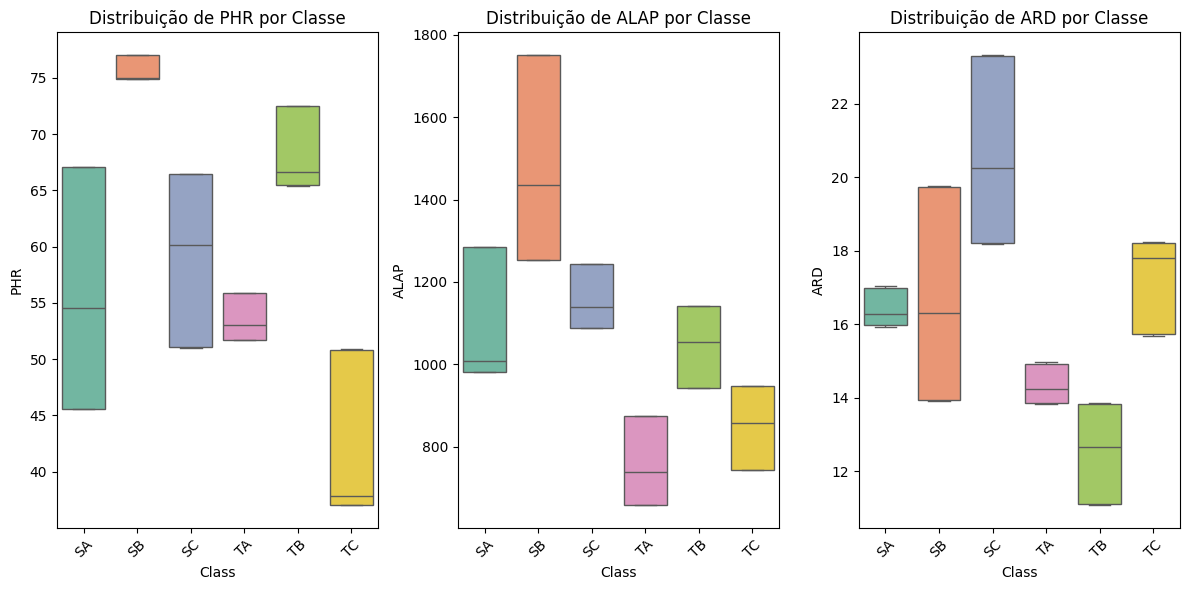

In [ ]:
key_vars = ["PHR", "ALAP", "ARD"]

plt.figure(figsize=(12,6))
for i, var in enumerate(key_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Class", y=var, data=df, palette="Set2")
    plt.title(f"Distribuição de {var} por Classe")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

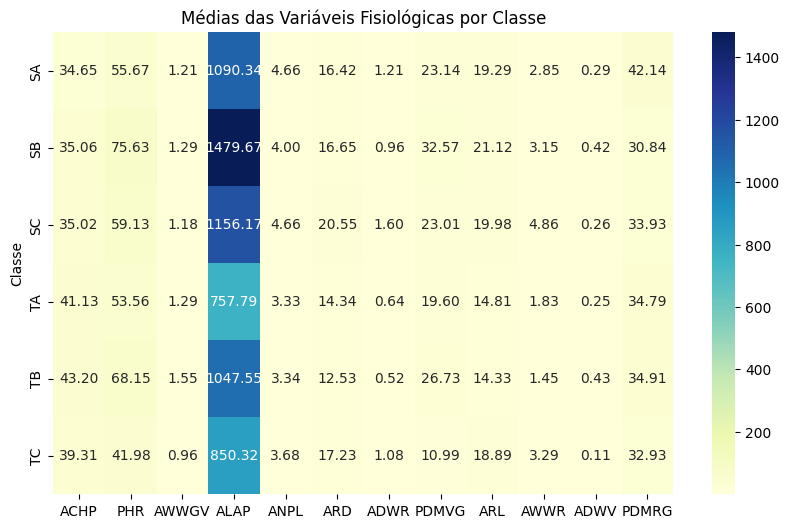

In [ ]:
class_means = df.groupby("Class").mean(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(class_means.drop(columns="Class_encoded"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Médias das Variáveis Fisiológicas por Classe")
plt.ylabel("Classe")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_scaled)

ari = adjusted_rand_score(y_train, clusters)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.4800541378767484


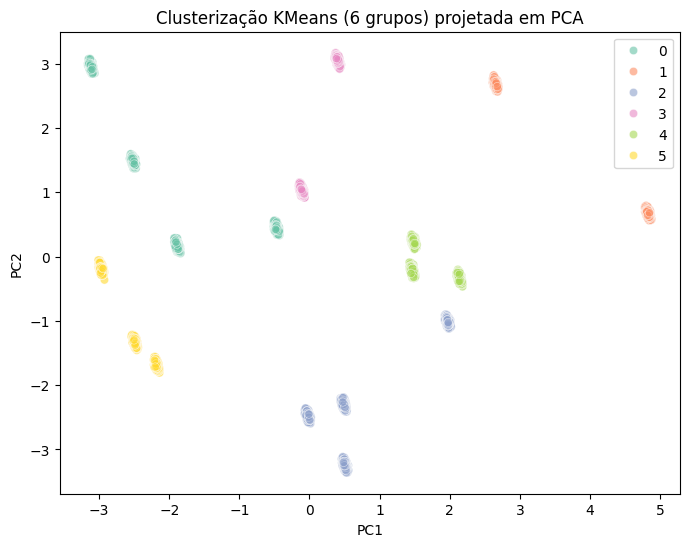

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", alpha=0.6)
plt.title("Clusterização KMeans (6 grupos) projetada em PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

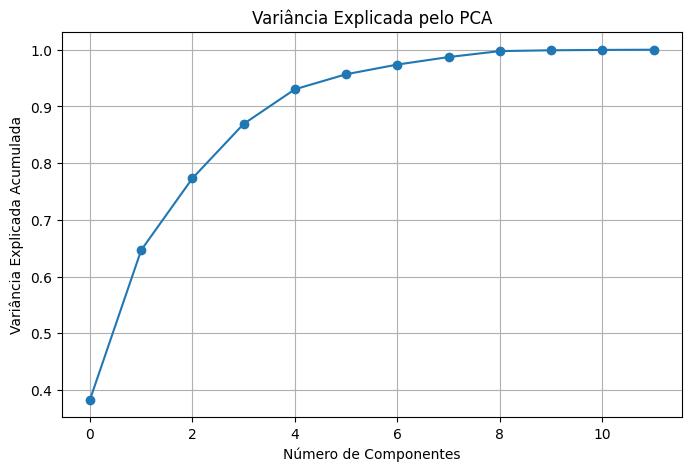

Variância explicada pelas 3 primeiras componentes: [0.38282449 0.64663253 0.77330205]


In [ ]:
pca_full = PCA().fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada pelo PCA")
plt.grid(True)
plt.show()

print("Variância explicada pelas 3 primeiras componentes:",
      np.cumsum(pca_full.explained_variance_ratio_)[:3])
